In [1]:
import requests
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Скачала датасет, в котoром представлены характеристтки  бриллиантов: их цвета, цены, гравировки и тд:


In [2]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: c:\Users\Мвидео\Desktop\diamonds.csv

  0%|          | 0.00/35.4M [00:00<?, ?B/s]
  1%|▏         | 524k/35.4M [00:00<00:16, 2.12MB/s]
  4%|▍         | 1.57M/35.4M [00:00<00:06, 4.95MB/s]
 15%|█▍        | 5.24M/35.4M [00:00<00:01, 15.4MB/s]
 21%|██        | 7.34M/35.4M [00:01<00:04, 7.02MB/s]
 31%|███       | 11.0M/35.4M [00:01<00:03, 6.26MB/s]
 43%|████▎     | 15.2M/35.4M [00:02<00:03, 6.41MB/s]
 49%|████▉     | 17.3M/35.4M [00:02<00:02, 6.10MB/s]
 55%|█████▍    | 19.4M/35.4M [00:03<00:03, 4.64MB/s]
 59%|█████▉    | 21.0M/35.4M [00:03<00:02, 5.32MB/s]
 78%|███████▊  | 27.8M/35.4M [00:03<00:00, 10.8MB/s]
 90%|█████████ | 32.0M/35.4M [00:04<00:00, 10.2MB/s]
100%|██████████| 35.4M/35.4M [00:04<00:00, 12.7MB/s]
100%|██████████| 35.4M/35.4M [00:04<00:00, 8.24MB/s]


In [3]:
import pandas as pd
diamonds=pd.read_csv('diamonds.csv')
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [ ]:
len(diamonds) #хотим узнать кол-во строк 

219703

In [6]:
diamonds[4:10] # понимаю, что многие значения в колонках, имена которых начинается с fluor_ нулевые, то есть не содержать данные. Их лучше убрать, 
#потому что при составлении графика данные могут быть неточно визуализированы

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
5,5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.81,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.84,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
7,7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.85,STK,TK,unknown,NaN,unknown,unknown,unknown,unknown,200
9,9,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.80,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200


In [7]:
#для начала узнаю кол-во пропусков, то есть значений "unknown" и "NaN"

(diamonds.isnull().sum()+diamonds.isin(['unknown']).sum()).sum() #функция isnull и isna идентичны 


1891168

In [8]:
#теперь хочу узнать в каких столбцах есть эти пропуски 

print(*diamonds.columns[(diamonds.isna().sum()>0)  | (diamonds.isin(['unknown']).sum()>0)], sep='\n')

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


In [9]:
#многие названия колонок начинаются с "fluor" или с  "fancy". Хочу сочитать сколько их 

print(sum( i.startswith('fluor')  | i.startswith('fancy') for i in diamonds.columns))

6


In [10]:
colom=[i for i in diamonds.columns if i.startswith('fluor') | i.startswith('fancy')]
all_colom=0
for i in colom:
    print(f'{i}-{(diamonds[i].isna() | diamonds[i].eq('unknown') ^1).sum() }')
    all_colom +=((diamonds[i].isna() | diamonds[i].eq('unknown') )^1).sum()
print(all_colom)

fluor_color-15726
fluor_intensity-219575
fancy_color_dominant_color-9164
fancy_color_secondary_color-1062
fancy_color_overtone-2038
fancy_color_intensity-9162
111586


In [11]:
#теперь я удалю эти столбцы. Дальше уже работаю без них, так с "чистым" датасетом визаулизация более точная
for c in colom:
    diamonds.drop(c, axis=1, inplace=True)

In [13]:
# для тренировки проделаю тоже самое с колонками под названием "culet"

col=[i for i in diamonds.columns if i.startswith('culet')]
all=0
for i in col: 
    print(f'{i}-{((diamonds[i].isna() | diamonds[i].eq('unknown'))^1).sum()}')
    all+=((diamonds[i].isna() | diamonds[i].eq('unknown') ) ^1).sum()
print(all)

for c in col:
    diamonds.drop(c, axis=1, inplace=True)


culet_size-133963
culet_condition-15319
149282


Теперь я буду визуализировать данный датасет:

[Text(0.5, 0, 'color'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'График завсисимости цвета бриллианта от цены')]

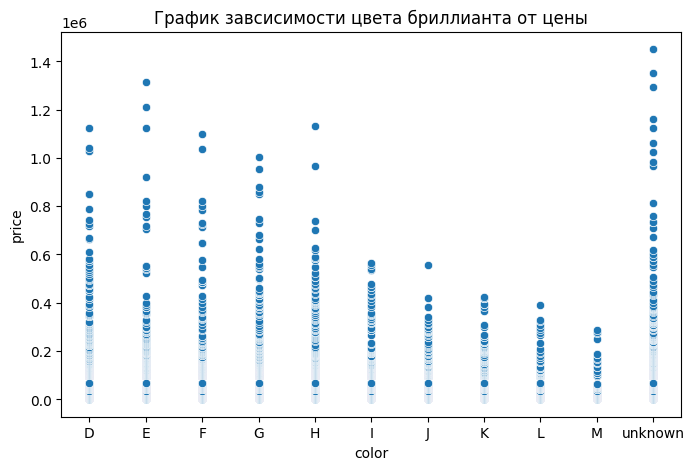

In [15]:
# график, показывающий цвет бриллианта и его стоимомость: 
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8,5))
diamonds['color']=pd.Categorical(diamonds['color'],['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'unknown'])
ax=sns.scatterplot(data=diamonds, y='total_sales_price', x='color')
ax.set(xlabel='color', ylabel='price', title='График завсисимости цвета бриллианта от цены')



Text(0, 0.5, 'цена')

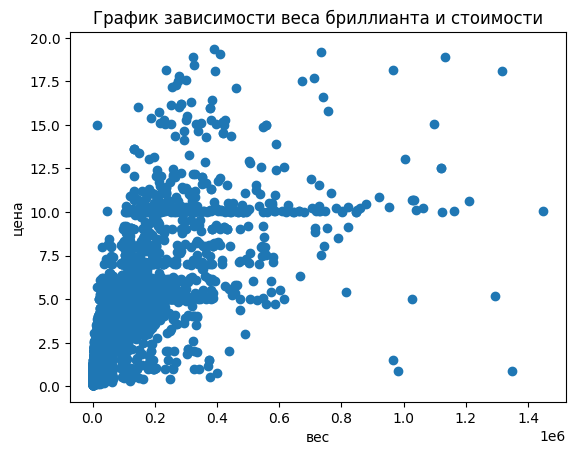

In [39]:
#визуализация зависимости веса бриллианта и стоимости: 

plt.scatter(diamonds['total_sales_price'],diamonds['carat_weight'], alpha=1)
plt.title("График зависимости веса бриллианта и стоимости")
plt.xlabel('вес')
plt.ylabel('цена')